# View the data distrubtion with T-SNE methods
### Use the data with out the category features, scale/normlize, do the tsne and plot the result

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import normalize

In [2]:
df = pd.read_csv("data/split-data/KDDTrain_dos_anomaly.csv") 

## Data preprocessing
### Preprocessing data: normarlization or standarlization

In [3]:
def convert_attributes_integer(df):
    # change catergory data to integers, because sklearn only accept integer input.
    for attribute in ["protocol_type","service","flag"]:
        le_attribute = preprocessing.LabelEncoder()   
        df[attribute] = le_attribute.fit_transform(df[attribute])
    #le_class = preprocessing.LabelEncoder()
    #df['class'] = le_class.fit_transform(df['class'])
    return df

In [4]:
df = convert_attributes_integer(df)
X_1 = df.iloc[0:4000,0:41].as_matrix()
X_1_normalized = preprocessing.normalize(X_1, norm='l2')

In [5]:
labels_1 = df.loc[0:3999,'class']

### T-SNE
t-SNE is a visualization algorithm that embeds things in 2 or 3 dimensions according to some desired distances. If you have some data and you can measure their pairwise differences, t-SNE visualization can help you identify various clusters.

In [6]:
from sklearn.manifold import TSNE
def plot_TSNE(X,labels,className):
    X_tsne = TSNE(n_components=2, random_state=0).fit_transform(X)
    #plot
    idx_1 = [i1 for i1 in range(len(labels)) if labels[i1]=='normal']
    plt.figure(figsize=(10, 5))
    plt.scatter(X_tsne[idx_1, 0], X_tsne[idx_1, 1], color = 'b',label = className[0])
    idx_2 = [i2 for i2 in range(len(labels)) if labels[i2]=='anomaly']
    plt.scatter(X_tsne[idx_2, 0], X_tsne[idx_2, 1], color = 'r',label = className[1])
    plt.legend()

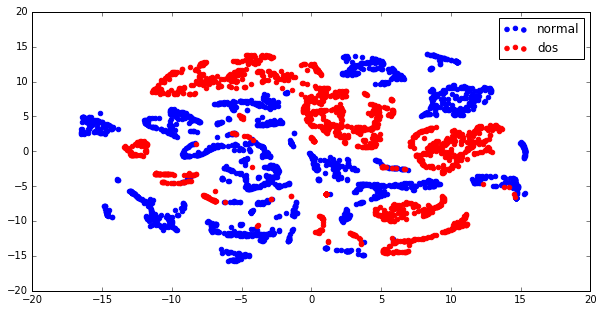

In [7]:
className = ['normal','dos']
plot_TSNE(X_1_normalized,labels_1,className)

In [8]:
#X_normalized = preprocessing.normalize(X, norm='l2')
#X_tsne1 = TSNE(n_components=2, random_state=0).fit_transform(X_normalized)

In [ ]:
df_probe = pd.read_csv("data/split-data/KDDTrain_probe_anomaly.csv")
df_probe = convert_attributes_integer(df_probe)
X_2 = df_probe.iloc[0:4000,0:41].as_matrix()
X_2_normalized = preprocessing.normalize(X_2, norm='l2')

labels_2 = df_probe.loc[0:3999,'class']
className_2 = ['normal','probe']

In [ ]:
plot_TSNE(X_2_normalized,labels_2,className_2)

In [ ]:
df_r = pd.read_csv("data/split-data/KDDTrain_r2l_anomaly_randnorm.csv")
df_r = convert_attributes_integer(df_r)
X_3 = df_r.iloc[:,0:41].as_matrix()
X_3_normalized = preprocessing.normalize(X_3, norm='l2')

labels_3 = df_r['class']
className_3 = ['normal','r2l']

plot_TSNE(X_3_normalized,labels_3,className_3)